In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris_ds = load_iris()
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

iris = pd.DataFrame(iris_ds.data, columns = column_names)
iris['species'] = iris_ds.target

print(iris.head())
print(iris.describe())
print(iris.shape)

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000  

In [4]:
spearman = iris.corr(method = "spearman")
#spearman is a dataframe containing all the correlations of the features with themselves and the target(species).
print(spearman)

              sepal_length  sepal_width  petal_length  petal_width   species
sepal_length      1.000000    -0.166778      0.881898     0.834289  0.798078
sepal_width      -0.166778     1.000000     -0.309635    -0.289032 -0.440290
petal_length      0.881898    -0.309635      1.000000     0.937667  0.935431
petal_width       0.834289    -0.289032      0.937667     1.000000  0.938179
species           0.798078    -0.440290      0.935431     0.938179  1.000000


The petal length and width correlates strongly with the species, they would be good features for training the model.

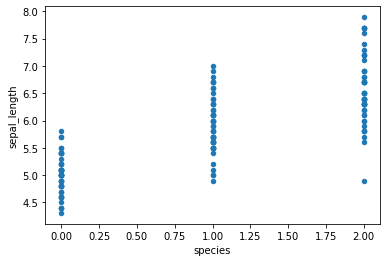

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

iris.plot(kind = "scatter", x = "species", y = "sepal_length")

The points overlap, it is hard to distinguish them as similar lengths fall under different species.

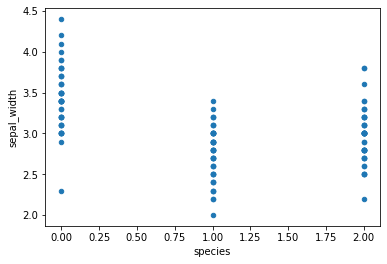

In [6]:
iris.plot(kind = "scatter", x = "species", y = "sepal_width")

The points also overlap, with similar widths falling under different species.
This shows that the sepal width and length are poorly correlated with the species type.

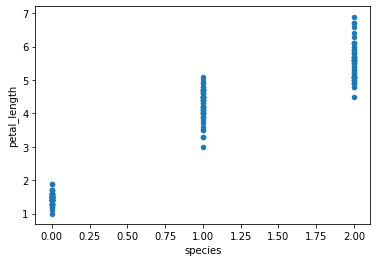

In [7]:
iris.plot(kind = "scatter", x = "species", y = "petal_length")

The plot shows a good correlation between the petal length and species type. 
We can immediately identify specie 0, though we notice that some of the points overlap for species 1 and 2. This indicates that 1 and 2 are similar and hard to differentiate from each other.

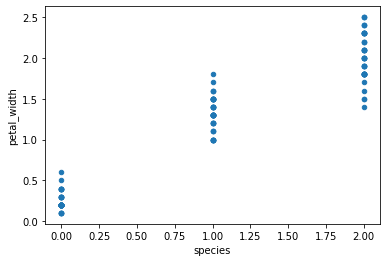

In [8]:
iris.plot(kind = "scatter", x = "species", y = "petal_width")

The plot shows a good correlation between the petal width and species type. 
We can also identify specie 0 easily, though we also notice that some of the points overlap for species 1 and 2.

We can conclude that the petal width and length would be the best choices as a feature to build a model with.
Species 0, 1 and 2 refer to Iris-Setosa, Iris-Versicolour and Iris-Virginica respectively.

In [9]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(iris)
scaled_iris = scale.transform(iris)

scaled_iris = pd.DataFrame(scaled_iris, columns = column_names + ["species"])

print(scaled_iris.head())
print(scaled_iris.describe())
print(scaled_iris.shape)

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


   sepal_length  sepal_width  petal_length  petal_width   species
0     -0.900681     1.019004     -1.340227    -1.315444 -1.224745
1     -1.143017    -0.131979     -1.340227    -1.315444 -1.224745
2     -1.385353     0.328414     -1.397064    -1.315444 -1.224745
3     -1.506521     0.098217     -1.283389    -1.315444 -1.224745
4     -1.021849     1.249201     -1.340227    -1.315444 -1.224745
       sepal_length   sepal_width  petal_length   petal_width       species
count  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02  1.500000e+02
mean  -4.736952e-16 -7.815970e-16 -4.263256e-16 -4.736952e-16 -1.421085e-16
std    1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00  1.003350e+00
min   -1.870024e+00 -2.433947e+00 -1.567576e+00 -1.447076e+00 -1.224745e+00
25%   -9.006812e-01 -5.923730e-01 -1.226552e+00 -1.183812e+00 -1.224745e+00
50%   -5.250608e-02 -1.319795e-01  3.364776e-01  1.325097e-01  0.000000e+00
75%    6.745011e-01  5.586108e-01  7.627583e-01  7.906707e-01  1.224745e